# PROBLEM STATEMENT

## A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, you want to sell a house and you don’t know the price which you can take — it can’t be too low or too high. To find house price you usually try to find similar properties in your neighbourhood and based on gathered data you will try to assess your house price.

# DATASET INFORMATION

## The dataset is composed of multiple variables. Each column in the table is particular building measurements/informations w.r.t target variable. The main aim of the data is to analyse and predict house prices.

# 1. EDA

In [ ]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read/Load the dataset

df = pd.read_csv("https://raw.githubusercontent.com/amit-tim/Predicting-House-Prices-in-Seattle/master/innercity.csv")

In [ ]:
# Head of Dataset

df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [ ]:
# Information about a dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [ ]:
# Data Types of Each Attributes

df.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed              int64
room_bath           float64
living_measure        int64
lot_measure           int64
ceil                float64
coast                 int64
sight                 int64
condition             int64
quality               int64
ceil_measure          int64
basement              int64
yr_built              int64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15         int64
furnished             int64
total_area            int64
dtype: object

In [ ]:
# Shape of the Dataset

df.shape

(21613, 23)

In [ ]:
#Checking Nan Values

df.isnull().sum() 

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

### Based on the EDA techniques, we found that the dataset has 21613 records and 23 features. It contains three data types. By using null function, we can see that there's no 'NaN' values present in the dataset.

## 1.a Five Point Summary

In [ ]:
# Descriptive Statistics of Each Attribute

df.describe().T 

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
ceil,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
coast,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sight,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
# Measure of Skewess

df.skew()

cid                  0.243329
price                4.021716
room_bed             1.974300
room_bath            0.511108
living_measure       1.471555
lot_measure         13.060019
ceil                 0.616177
coast               11.385108
sight                3.395750
condition            1.032805
quality              0.771103
ceil_measure         1.446664
basement             1.577965
yr_built            -0.469805
yr_renovated         4.549493
zipcode              0.405661
lat                 -0.485270
long                 0.885053
living_measure15     1.108181
lot_measure15        9.506743
furnished            1.526232
total_area          12.956067
dtype: float64

### Some of the features have high standard deviation which defines that the features are having wide range of spread, should have outliers.

### By using skew function, we found the measure of skewness of each feature. lot_measure,coast and total_area was highly right skewed as compared to other features, which defines it has more weights on left tail of distribution. 

### Yr_built and Lat are slightly left skewed.


# 2. Distribution of Each Features by using Plots

## 2.a Pair Plot

In [ ]:
# Correlation Matrix of the continuous variables/attributes
# Bivariate Analysis

# sns.pairplot(df,diag_kind = 'kde')
# plt.show()

## 2.b Box Plot

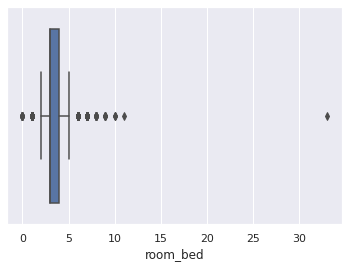

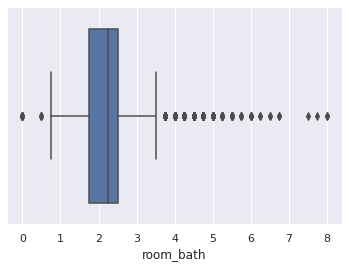

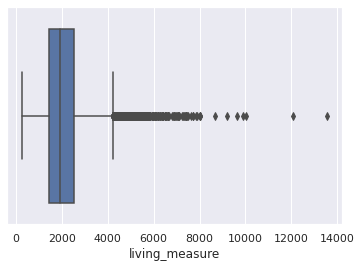

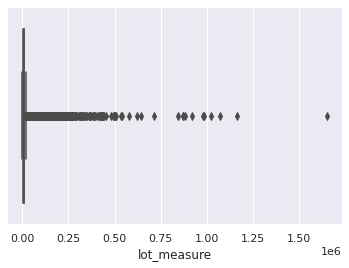

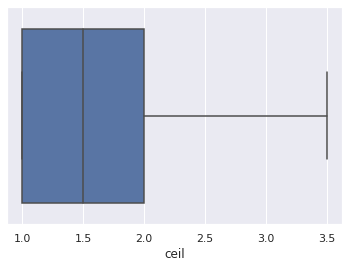

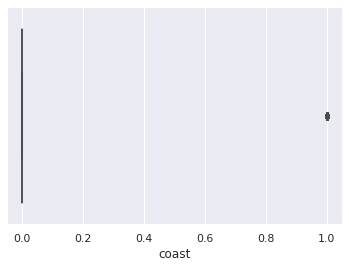

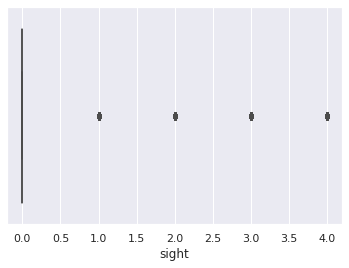

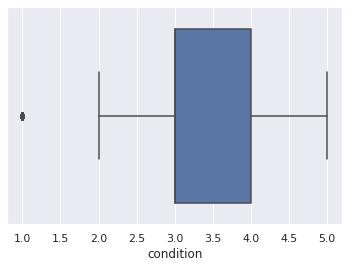

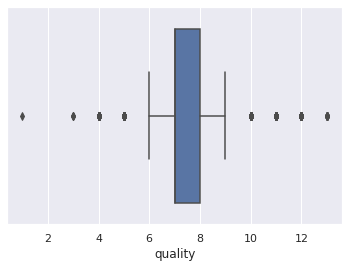

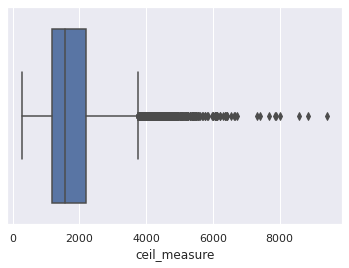

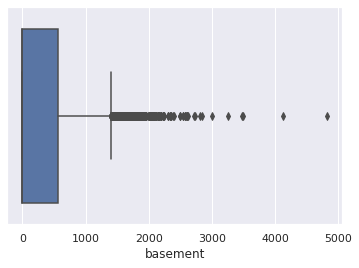

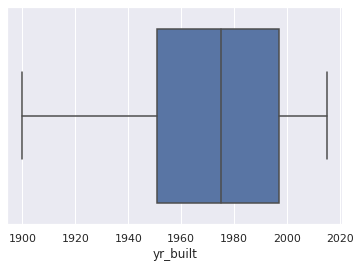

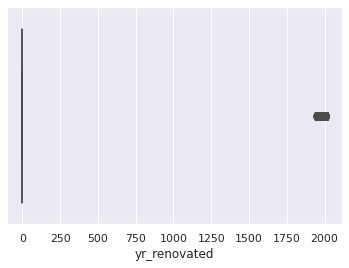

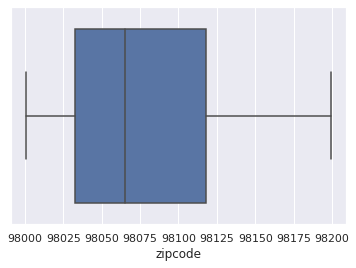

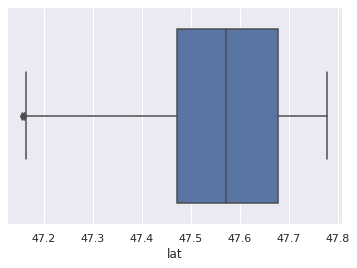

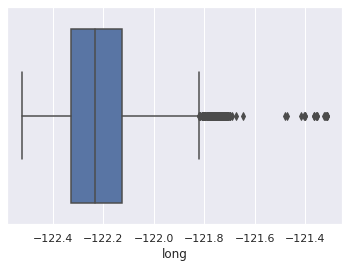

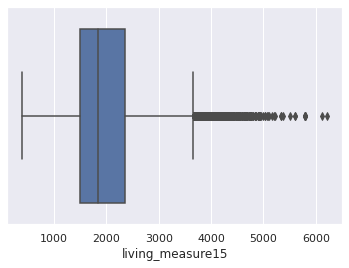

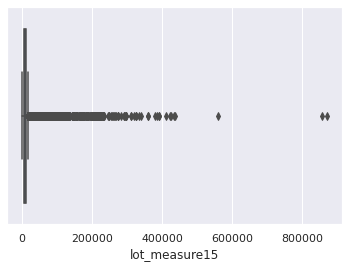

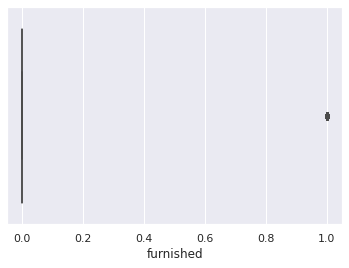

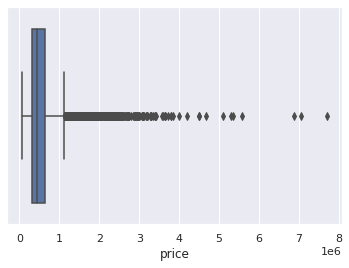

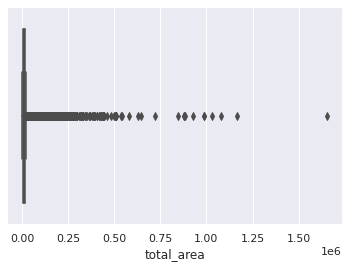

In [ ]:
sns.boxplot(x = df.room_bed)
plt.show()

sns.boxplot(x = df.room_bath)
plt.show()

sns.boxplot(x = df.living_measure)
plt.show()

sns.boxplot(x = df.lot_measure)
plt.show()

sns.boxplot(x = df.ceil)
plt.show()

sns.boxplot(x = df.coast)
plt.show()

sns.boxplot(x = df.sight)
plt.show()

sns.boxplot(x = df.condition)
plt.show()

sns.boxplot(x = df.quality)
plt.show()

sns.boxplot(x = df.ceil_measure)
plt.show()

sns.boxplot(x = df.basement)
plt.show()

sns.boxplot(x = df.yr_built)
plt.show()

sns.boxplot(x = df.yr_renovated)
plt.show()

sns.boxplot(x = df.zipcode)
plt.show()

sns.boxplot(x = df.lat)
plt.show()

sns.boxplot(x = df.long)
plt.show()

sns.boxplot(x = df.living_measure15)
plt.show()

sns.boxplot(x = df.lot_measure15)
plt.show()

sns.boxplot(x = df.furnished)
plt.show()

sns.boxplot(x = df.price)
plt.show()

sns.boxplot(x = df.total_area)
plt.show()



### By using boxplot, we found outliers of individual feature. As we can see that in plot, outliers are present in most of the features. 

### As we know that the outliers are not good to keep while built a model. So we'll use specific technique to either drop or replace outliers.

## 2.c Heat Map

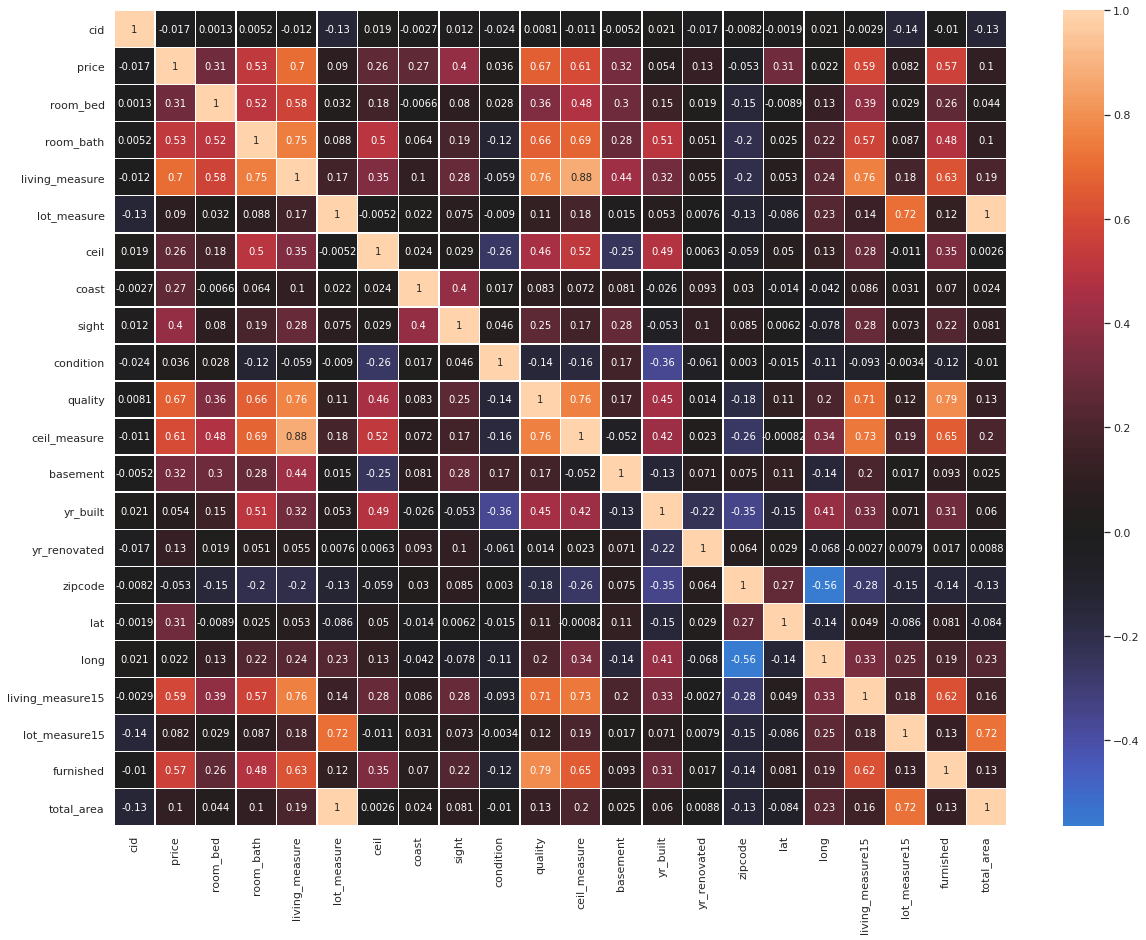

In [ ]:
# A HeatMap of Correlation Matrix

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=0.5,
            center=0)
plt.show()

### By using heat map, we plotted a correlation matrix. The target variable price has high correlation with living_measure, quality and ceil_measure. 

### As we can notice that some of the features are not correlated with target varaiable, So we'll drop/neglect those features or we can use dimensionality reduction technique in order to increase the model performance.

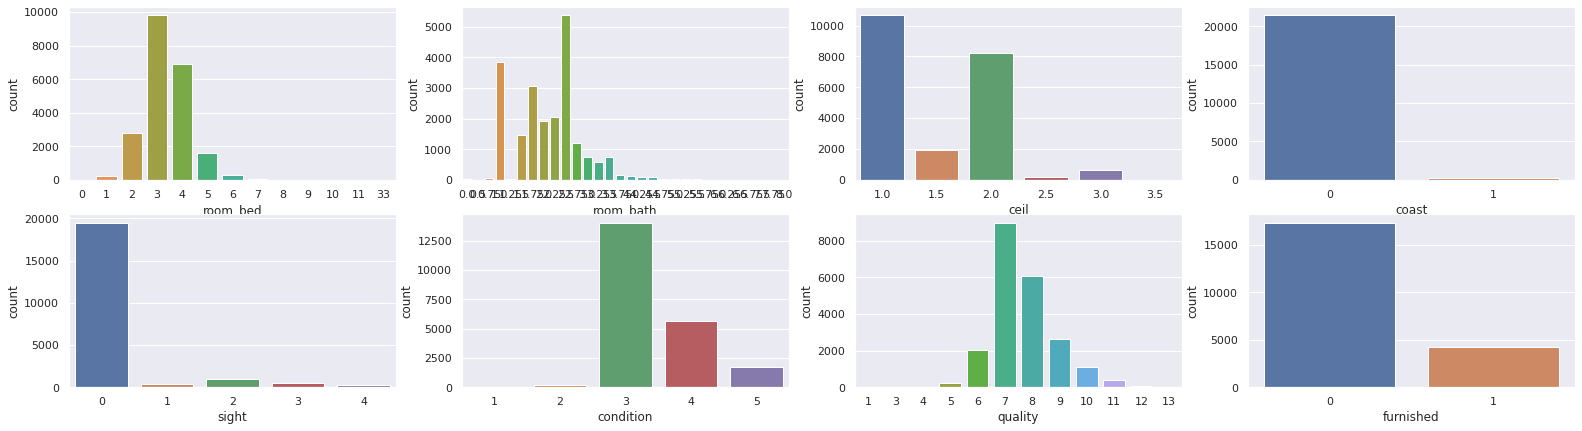

In [ ]:
# Univariate Analysis

# Categorical/Ordinal:
cat = ["room_bed", "room_bath", "ceil", "coast", "sight", "condition", "quality", "furnished"]
plt.figure(figsize = (27,7))
p = 1
for i in cat:
  plt.subplot(2,4,p)
  sns.countplot(df[i])
  p+=1

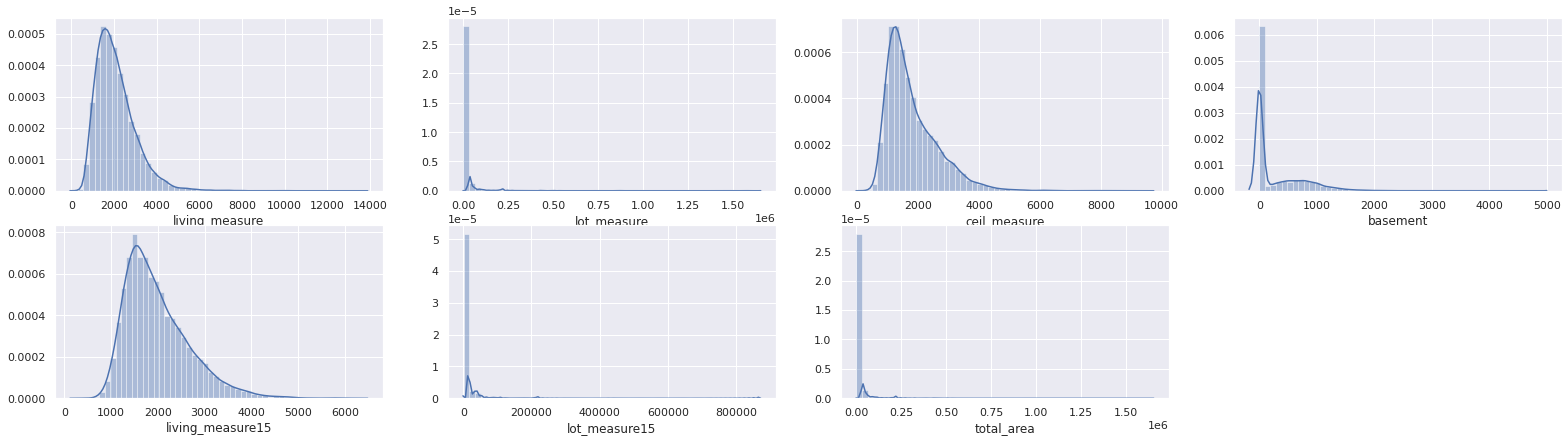

In [ ]:
## Continuous variable Distribution:
con = ["living_measure", "lot_measure", "ceil_measure", "basement", "living_measure15", "lot_measure15", "total_area"]
plt.figure(figsize = (27,7))
p = 1
for i in con:
  plt.subplot(2,4,p)
  sns.distplot(df[i])
  p+=1

In [ ]:
# Coverting dayhours into yr_sold

df["yr_sold"] = df["dayhours"].apply(lambda x:x.split('T')[0][:4])

In [ ]:
import copy
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encoding categorical features

df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['room_bath','ceil','basement','yr_built', 'zipcode','lat','long','yr_sold']] = df_encoded.loc[:,['room_bath','ceil','basement','yr_built', 'zipcode','lat','long','yr_sold']].apply(LabelEncoder().fit_transform) 


In [ ]:
df_encoded.groupby('coast').nunique()

In [ ]:
df_encoded.groupby('furnished').nunique()

In [ ]:
df_encoded.groupby('sight').nunique()

In [ ]:
df_encoded.groupby('yr_renovated').nunique()

### By grouping the features(coast, sight, yr_renovated, furnished), we found that almost 80% - 90% of data points are zeros. It  doesn't have much variance, So we'll drop those columns

In [ ]:
# Dropping notation of house and dayhours

df_encoded.drop(labels = ['cid','dayhours','coast','sight','yr_renovated','furnished'], axis =1, inplace = True)

In [ ]:
df_encoded.head()

## 2.d Individual Features Distribution

In [ ]:
# Frequency Distribution of Each Feature Before Removing Outliers

plt.figure(figsize= (25,25))  
pos = 1    
for feature in df_encoded.columns:   
    plt.subplot(6, 4, pos)   
    if feature in [['room_bed', 'room_bath','ceil','coast', 'sight','condition', 'quality', 'furnished', 'yr_sold']]: 
          sns.countplot(df_encoded[feature], palette= 'Blues')  
    else:
          sns.distplot(df_encoded[feature], kde= True ) # Plot histogram for all the continuous attributes
    pos +=1   


### In the above plot, we can see the frequency distribution of each feature. As per the plot, we notice that most of the features have outliers in their records.

### Few features have unimodal distribution and most features are multimodal distribution (More than two peaks/distinct values)

### Most of the features have high frequency on left tail of distribution.

In [ ]:
# Categorical Distribution of Each Features Before Removing of Outliers

cat = ["room_bed", "room_bath", "ceil",  "condition", "quality", "yr_sold"]
plt.figure(figsize=(26,15))
p = 1
for i in cat:
  plt.subplot(3,3,p)
  sns.boxplot(df_encoded[i], df_encoded["price"])
  p+=1

In [ ]:
# IQR Method

def remove_outliers(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lr=Q1-(1.5*IQR)
    ur=Q1+(1.5*IQR)    
    return lr,ur

In [ ]:
for column in df_encoded.columns:
    if df_encoded[column].dtype !='object':
        lr,ur=remove_outliers(df_encoded[column])
        df_encoded[column]= np.where(df_encoded[column]>ur,ur,df_encoded[column])
        df_encoded[column]= np.where(df_encoded[column]<lr,lr,df_encoded[column])    

In [ ]:
# Frequency Distribution of Continuos Features after Outlier treatement

con = ["living_measure", "lot_measure", "ceil_measure", "basement", "living_measure15", "lot_measure15", "total_area"]
plt.figure(figsize=(28,10))
p = 1
for i in con:
  plt.subplot(2,4,p)
  sns.scatterplot(df_encoded[i],df_encoded['price'])
  p+=1

In [ ]:
# Categorical Distribution of Each Features After Removing of Outliers

cat = ["room_bed", "room_bath", "ceil",  "condition", "quality", "yr_sold"]
plt.figure(figsize=(26,15))
p = 1
for i in cat:
  plt.subplot(3,3,p)
  sns.boxplot(df_encoded[i], df_encoded["price"])
  p+=1

# 3. Model Building and Evaluation Measures

In [ ]:
# Defining Predictor and target variable

x = df_encoded.drop(labels= 'price',axis = 1)
y = df_encoded['price']

In [ ]:
# Standardization of dataset

from scipy.stats import zscore
x_scaled = x.apply(zscore) 

In [ ]:
x_scaled

In [ ]:
# Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size= 0.3, random_state=1)

In [ ]:
# Shape of Training data

x_train.shape,y_train.shape

In [ ]:
# Shape of Test data

x_test.shape,y_test.shape

In [ ]:
# importing Regression Libraries

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## 3.a Ordinary Least Squares Method

In [ ]:
import statsmodels.formula.api as smf 

In [ ]:
df_new = x_train.join(y_train)

In [ ]:
model = smf.ols(formula= 'y_train ~ x_train' , data=df_new)
result = model.fit()
result.params

In [ ]:
result.summary()

### From OLS method, we find the P values for each predictor variables as per confidence interval (Alpha = 0.05). 

### Most of the predictor variables have low P value (P < 0.05) which is likely to be a meaningful addition(Significant) to the model, because changes in predictor's values are related to chages in the target variable (Most Significant).

### Conversely, couple of features x[7],x[8] (Ceil Measure & Basement) have high P value (P>0.05) which suggests that chages in predictor are not associated with changes in target variable (Insignificant).

In [ ]:
# User Defined Function for Multiple Models

def fit_n_print(model, x_train, x_test, y_train, y_test):  # Take the model and data as input
    
    model.fit(x_train, y_train)   # Fitting the training_set data
    
    training_pred = model.predict(x_train)  # Predictions on the training_set data
    test_pred = model.predict(x_test)  # Predictions on the test_set data

    training_score = round(model.score(x_train, y_train), 2)   # Compute accuracy for training_set data
    test_score = round(model.score(x_test, y_test), 2)   # Compute accuracy for test_set data

    training_mape = round(np.mean(np.abs((y_train - training_pred) / y_train)) * 100,2) # Mean Absolute Percentage Error on Training_set
    test_mape = round(np.mean(np.abs((y_test - test_pred) / y_test)) * 100,2) # Mean Absolute Percentage Error on Test_set

    return training_score,test_score,training_mape,test_mape   # Return all the measures
    

## 3.b Linear Regression Models

In [ ]:
# Linear Regression
lr = LinearRegression()
lr_training_score,lr_test_score,lr_training_mape,lr_test_mape = fit_n_print(lr, x_train, x_test, y_train, y_test)

# Support Vector Regression
svr = SVR(kernel = 'poly')
svr_training_score,svr_test_score,svr_training_mape,svr_test_mape = fit_n_print(svr, x_train, x_test, y_train, y_test)



In [ ]:
#Evaluation Measures of Regression Models

lr_result = pd.DataFrame({'Model' : ['Linear Regression', 'Support Vector Regression'],
 'Training_Accuracy': [ lr_training_score , svr_training_score],
 'Test_Accuracy': [ lr_test_score , svr_test_score],
 'Training_MAPE': [ lr_training_mape , svr_training_mape ],
 'Test_MAPE': [ lr_test_mape ,svr_test_mape ]
 })

lr_result

In [ ]:
# Linear Regression Plot : Actual Vs Predicted

lr_pred = lr.predict(x_test)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=lr_pred, kind="reg", color="k");

### Linear regression assumes the linearity between predictor variables and target variable. As we can clearly see in the distribution plot, not all the predictor variables are linear to the target variable. It's not linearly separable w.r.t target variable.

### In plots, we can notice that features like lot_measure , lot_measure15 & living_measure, living_measure 15 both are linear w.r.t target variable, which indicates that there are strong multicolinearity present in the model.

### In regression plot, we found that the sum of squared errors are high in linear models. 

### So linear models doesn't fit the best line based on above criteria.

## 3.c Regularization Models

In [ ]:
# Ridge Regression
ridge = Ridge(alpha=.3)
ridge_training_score,ridge_test_score,ridge_training_mape,ridge_test_mape = fit_n_print(ridge, x_train, x_test, y_train, y_test)

#Lasso Regression
lasso = Lasso(alpha=.1)
lasso_training_score,lasso_test_score,lasso_training_mape,lasso_test_mape = fit_n_print(lasso, x_train, x_test, y_train, y_test)



In [ ]:
# Coefficients of Ridge Model

print ("Ridge model:", (ridge.coef_))

In [ ]:
# Coefficients of Lasso Model

print ("Lasso model:", (lasso.coef_))

In [ ]:
#Evaluation Measures of Regularization Models

reg_result = pd.DataFrame({'Model' : [ 'Ridge', 'Lasso'],
 'Training_Accuracy': [ ridge_training_score ,  lasso_training_score],
 'Test_Accuracy': [ ridge_test_score ,  lasso_test_score],
 'Training_MAPE': [ ridge_training_mape ,  lasso_training_mape],
 'Test_MAPE': [ ridge_test_mape ,  lasso_test_mape]
 })

reg_result

In [ ]:
# Ridge Regression Plot : Actual Vs Predicted

sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=ridge.predict(x_test), kind="reg", color="k");

### Ridge shrinks the coeficients for least important predictors, very close to zero. Lasso encourages shrinking of coeficients to zero. But in this case, magnitute of coeficients are very high in both the models.

### In the evaluation measures, we can notice that both models are under fitted. It defines, models have low variance and high bias.

### In regression plot, we found that the sum of squared errors and magnitute of coefficients are high in regularization models. 

### So Regularization models also doesn't fit the best line.  

## 3.d Ensemble Techniques

In [ ]:
# Decision Tree regression
dt = DecisionTreeRegressor(max_depth =10)
dt_training_score,dt_test_score,dt_training_mape,dt_test_mape = fit_n_print(dt, x_train, x_test, y_train, y_test)

# KNeighbors Regression 
knr = KNeighborsRegressor(n_neighbors=8)
knr_training_score,knr_test_score,knr_training_mape,knr_test_mape = fit_n_print(knr, x_train, x_test, y_train, y_test)

# Ada Boost Regression
abr = AdaBoostRegressor(n_estimators =50, learning_rate = 0.2)
abr_training_score,abr_test_score,abr_training_mape,abr_test_mape = fit_n_print(abr, x_train, x_test, y_train, y_test)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators =50)
rf_training_score,rf_test_score,rf_training_mape,rf_test_mape = fit_n_print(rf, x_train, x_test, y_train, y_test)

# Gradient Boost Regression
gbr = GradientBoostingRegressor(max_depth =5, learning_rate = 0.1, n_estimators=100)
gbr_training_score,gbr_test_score,gbr_training_mape,gbr_test_mape = fit_n_print(gbr, x_train, x_test, y_train, y_test)


In [ ]:
#Evaluation Measures of Ensemble Models

ensemble_result = pd.DataFrame({'Model' : [ 'Decision Tree','KNN','Ada Boost','Random Forest','Gradient Boost'],
 'Training_Accuracy': [ dt_training_score, knr_training_score, abr_training_score,rf_training_score,  gbr_training_score],
 'Test_Accuracy': [ dt_test_score, knr_test_score, abr_test_score, rf_test_score, gbr_test_score],
 'Training_MAPE': [ dt_training_mape,knr_training_mape, abr_training_mape,  rf_training_mape, gbr_training_mape],
 'Test_MAPE': [ dt_test_mape, knr_test_mape,abr_test_mape,  rf_test_mape, gbr_test_mape]
 })

ensemble_result

# 4. Visualization of Ensemble Models

In [ ]:
# Decision Tree Residual Plot : Actual Vs Predicted

sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=dt.predict(x_test), kind="resid", color="k");

In [ ]:
# K Neighbors Residual Plot : Actual Vs Predicted

sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=knr.predict(x_test), kind="resid", color="k");

In [ ]:
# AdaBoost Residual Plot : Actual Vs Predicted

sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=abr.predict(x_test), kind="resid", color="k");

In [ ]:
# Random Forest Regression Plot : Actual Vs Predicted

sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=rf.predict(x_test), kind="reg", color="k");

In [ ]:
# Gradient Boost Regression Plot : Actual Vs Predicted

sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=gbr.predict(x_test), kind="reg", color="k");

### In random forest feature selection, the trees are more independent(Non Linear) of each other compared to other models, which results in better predictive performace due to better variance.

### In above plots, we can see that non linear models random forest and gradient boost regression have least sum of squared errors as compared to other models. 

### By comparing all of evaluation measures, we can see that the gradient boost regressor gives the best performance results. So we'll apply feature engineering and hyper parameter tuning into that model in order to increase the model performance.

# 5. Approaches to improve model performance

### i) Feature Selection (Importance)
### ii) Hyper Parameter Tuning

# Hyper Parameter Tuning : Basic GBR model

In [234]:
# Finding best hyperparameters of gradient boost regressor

gbr1 = GradientBoostingRegressor()

param_dist1 = {"max_depth": [8,10,13,None],
               "learning_rate" : [0.1,0.3,0.5],
              "n_estimators" :[50,100,150],
              "max_features": ['auto', 'log2','sqrt'],
              "min_samples_split": [2,3,5,10],
              "min_samples_leaf": [1,2,3,5,10]}

In [235]:
# creating and fitting random search CV into Gradient Boost Regressor

from sklearn.model_selection import RandomizedSearchCV

gbr_random = RandomizedSearchCV(estimator=gbr1, param_distributions=param_dist1,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [236]:
gbr_random.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [237]:
# Finding Best Parameters

gbr_random.best_params_

{'learning_rate': 0.3,
 'max_depth': 13,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 150}

In [238]:
# Apply best combination of hyper parameters and fit into GBR

gbr_model1 = GradientBoostingRegressor(n_estimators =150,min_samples_split =3,
 min_samples_leaf= 10,
 max_features='auto',
 max_depth=4, learning_rate =0.1)
gbr_model1.fit(x_train,y_train)
gbr_training_pred1 = gbr_model1.predict(x_train)
gbr_test_pred1 = gbr_model1.predict(x_test)

gbr_training_score1 = round(gbr_model1.score(x_train,y_train),2)
gbr_training_score1

0.9

In [239]:
# Test set accuracy after tuning

gbr_test_score1 = round(gbr_model1.score(x_test,y_test),2)
gbr_test_score1

0.89

In [240]:
# Training & Test set MAPE after tuning

gbr_training_mape1 = round(np.mean(np.abs((y_train - gbr_training_pred1) / y_train)) * 100,2) # Mean Absolute Percentage Error on Training_set
gbr_test_mape1 = round(np.mean(np.abs((y_test - gbr_test_pred1) / y_test)) * 100,2) # Mean Absolute Percentage Error on Test_set


In [241]:
#Evaluation Measures of Basic GBR Model after Tuning

results = pd.DataFrame({'Model' : ['Gradient Boost : Basic Model after Tuning'],
 'Training_Accuracy': [ gbr_training_score1],
 'Test_Accuracy': [  gbr_test_score1],
  'Training_MAPE': [ gbr_training_mape1],
  'Test_MAPE' : [gbr_test_mape1]

    })

results

,Model,Training_Accuracy,Test_Accuracy,Training_MAPE,Test_MAPE
0,Gradient Boost : Basic Model after Tuning,0.9,0.89,10.73,11.58


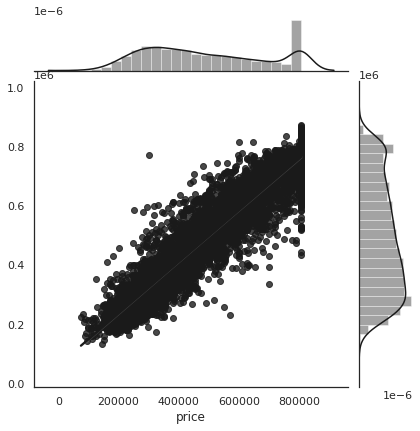

In [242]:
# Gradient Boost Regression Plot : Actual Vs Predicted

sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=gbr_model1.predict(x_test), kind="reg", color="k");

### After tuning also we get the same scores in test set. So we'll do a feature engineering and tuning to get better results.

# Feature Selection

### we found that the gradient boost regressor gives better scores than the other models. So let's get the most important features from that model.

In [243]:
# Get the Most Important Features from GBR

# print (pd.DataFrame(gbr.feature_importances_, columns = ["Imp"], index = x_train.columns))

### From the above dataframe, we found five features (living_measure, quality, lat, long, yr_built) are covering 95% of variance. So let's keep only those features and built the model.

In [244]:
# Removing less important features and keep only most important features

x1 = df_encoded[['quality','lat','long','living_measure','yr_built']]
y1 = df_encoded['price']

In [245]:
x1.head()

,quality,lat,long,living_measure,yr_built
0,8.5,4442.0,144.0,3020.0,56.0
1,8.0,621.0,94.0,2550.0,76.0
2,8.0,934.0,456.5,2370.0,106.0
3,6.0,4318.0,131.0,820.0,16.0
4,8.0,4037.0,211.0,1400.0,54.0


In [246]:
x_scaled1 = x1.apply(zscore)
x_scaled1

,quality,lat,long,living_measure,yr_built
0,1.304755,1.162115,-0.934420,1.471503,-0.510853
1,0.676014,-1.746363,-1.345526,0.801457,0.170051
2,0.676014,-1.508113,1.634990,0.544843,1.191407
3,-1.838950,1.067728,-1.041307,-1.664883,-1.872660
4,0.676014,0.853836,-0.383538,-0.838018,-0.578943
...,...,...,...,...,...
21608,0.676014,-1.683185,0.471561,0.449326,1.191407
21609,0.676014,-1.316295,0.784002,1.601948,1.089271
21610,0.676014,-0.606873,1.634990,1.143608,1.463768
21611,-0.581468,1.516065,0.520894,-0.780992,0.476458


In [247]:
# Splitting dataset into training and test

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled1, y1, test_size= 0.3, random_state=1)

In [248]:
# Linear Regression
lr = LinearRegression()
lr_training_score,lr_test_score,lr_training_mape,lr_test_mape = fit_n_print(lr, x_train1, x_test1, y_train1, y_test1)

# Ridge Regression
ridge = Ridge()
ridge_training_score,ridge_test_score,ridge_training_mape,ridge_test_mape = fit_n_print(ridge, x_train1, x_test1, y_train1, y_test1)

#Lasso Regression
lasso = Lasso()
lasso_training_score,lasso_test_score,lasso_training_mape,lasso_test_mape = fit_n_print(lasso, x_train1, x_test1, y_train1, y_test1)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators =50)
rf_training_score,rf_test_score,rf_training_mape,rf_test_mape = fit_n_print(rf, x_train1, x_test1, y_train1, y_test1)

#Decision Tree regression
dt = DecisionTreeRegressor()
dt_training_score,dt_test_score,dt_training_mape,dt_test_mape = fit_n_print(dt, x_train1, x_test1, y_train1, y_test1)

# Ada Boost Regression
abr = AdaBoostRegressor(n_estimators =50, learning_rate = 0.2)
abr_training_score,abr_test_score,abr_training_mape,abr_test_mape = fit_n_print(abr, x_train1, x_test1, y_train1, y_test1)

#KNeighbors Regression 
knr = KNeighborsRegressor(n_neighbors=8)
knr_training_score,knr_test_score,knr_training_mape,knr_test_mape = fit_n_print(knr, x_train1, x_test1, y_train1, y_test1)

# Gradient Boost Regression
gbr = GradientBoostingRegressor(max_depth =5, learning_rate = 0.1, n_estimators=100)
gbr_training_score,gbr_test_score,gbr_training_mape,gbr_test_mape = fit_n_print(gbr, x_train1, x_test1, y_train1, y_test1)


In [249]:
#Evaluation Measures of Regression Models after Feature Selection

result = pd.DataFrame({'Feature Selection Models' : ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest','Decision Tree','Ada Boost','KNN','Gradient Boost'],
 'Training_Accuracy': [ lr_training_score ,  ridge_training_score ,  lasso_training_score , rf_training_score, dt_training_score, abr_training_score, knr_training_score, gbr_training_score],
 'Test_Accuracy': [ lr_test_score ,  ridge_test_score ,  lasso_test_score , rf_test_score, dt_test_score, abr_test_score, knr_test_score, gbr_test_score],
 'Training_MAPE': [ lr_training_mape ,  ridge_training_mape ,  lasso_training_mape , rf_training_mape, dt_training_mape, abr_training_mape, knr_training_mape, gbr_training_mape],
 'Test_MAPE': [ lr_test_mape ,  ridge_test_mape ,  lasso_test_mape , rf_test_mape, dt_test_mape, abr_test_mape, knr_test_mape, gbr_test_mape]
 })

result

,Feature Selection Models,Training_Accuracy,Test_Accuracy,Training_MAPE,Test_MAPE
0,Linear Regression,0.69,0.69,20.65,20.71
1,Ridge,0.69,0.69,20.65,20.71
2,Lasso,0.69,0.69,20.65,20.71
3,Random Forest,0.98,0.87,4.70,12.03
4,Decision Tree,1.00,0.76,0.33,15.62
5,Ada Boost,0.74,0.73,20.97,21.16
6,KNN,0.88,0.85,11.38,12.90
7,Gradient Boost,0.89,0.87,11.20,12.27


### The above evaluation measures is a results of feautre selection models where we kept only the 6 most importance features(living_measure, quality, lat, long, living_measure15, yr_built). In that, we found the linear models are underfitted which indiactes that models are having high bais and less variance.

### Whereas non linear models like decision tree and random forest are overfittied which indicates that models are having low bias and high variance.

### Anyhow after featurte selection by kept only most important(5) features, we get a good evaluation measures.

### Gradient Boost Algorithm gives better scores in test data than the other models. So Let's apply hyper parameter tuning into the same model.

# Hyper Parameter Tuning : After Feature Selection (GBR)

In [250]:
# Finding best hyperparameters of gradient boost regressor

gbr2 = GradientBoostingRegressor()

param_dist2 = {"max_depth": [8,10,13,None],
               "learning_rate" : [0.1,0.3,0.5],
              "n_estimators" :[50,100,150],
              "max_features": ['auto', 'log2','sqrt'],
              "min_samples_split": [2,3,5,10],
              "min_samples_leaf": [1,2,3,5,10]}

In [251]:
# creating and fitting random search CV into Gradient Boost Regressor

gbr_random2 = RandomizedSearchCV(estimator=gbr2, param_distributions=param_dist2,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [252]:
gbr_random2.fit(x_train1, y_train1)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [253]:
# Finding Best Parameters

gbr_random2.best_params_

{'learning_rate': 0.3,
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 150}

In [254]:
# Apply best combination of hyper parameters and fit into GBR

gbr_model2 = GradientBoostingRegressor(n_estimators =110,min_samples_split =5,
 min_samples_leaf= 5,
 max_features='auto',
 max_depth=6, learning_rate =0.1)
gbr_model2.fit(x_train1,y_train1)
gbr_training_pred2 = gbr_model2.predict(x_train1)
gbr_test_pred2 = gbr_model2.predict(x_test1)

gbr_training_score2 = round(gbr_model2.score(x_train1,y_train1),2)
gbr_training_score2

0.91

In [255]:
# Test set accuracy after tuning

gbr_test_score2 = round(gbr_model2.score(x_test1,y_test1),2)
gbr_test_score2

0.88

In [256]:
# Training & Test set MAPE after tuning

gbr_training_mape2 = round(np.mean(np.abs((y_train1 - gbr_training_pred2) / y_train1)) * 100,2) # Mean Absolute Percentage Error on Training_set
gbr_test_mape2 = round(np.mean(np.abs((y_test1 - gbr_test_pred2) / y_test1)) * 100,2) # Mean Absolute Percentage Error on Test_set


In [257]:
#Evaluation Measures of Feature Selection GBR after Tuning

results = pd.DataFrame({'Model' : ['Gradient Boost : Feature Selection after Tuning'],
 'Training_Accuracy': [ gbr_training_score2],
 'Test_Accuracy': [  gbr_test_score2],
  'Training_MAPE': [ gbr_training_mape2],
  'Test_MAPE' : [gbr_test_mape2]

    })

results

,Model,Training_Accuracy,Test_Accuracy,Training_MAPE,Test_MAPE
0,Gradient Boost : Feature Selection after Tuning,0.91,0.88,10.27,11.88


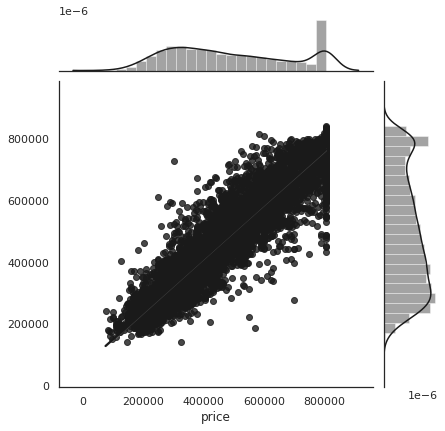

In [258]:
# Gradient Boost Regression Plot : Actual Vs Predicted

sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test1, y=gbr_model2.predict(x_test1), kind="reg", color="k");

### After applying a hyper parameter tuning into GBR feature selection, we get 1% increase in test set accuracy.

### In regression plot, we can notice that the data points are close to the regression line which denotes the sum of squared errors are less and the model fits the best line.

### We kept only Five  most important features by using feature selection which explains 95% of variance and we found the better results in test data (GBR model).

In [ ]:
#Evaluation Measures of Gradient Boost Model using different techniques

results = pd.DataFrame({'Gradient Boost' : [ 'Basic Model after Tuning','Feature Selection after Tuning'],
 'Training_Accuracy': [ gbr_training_score1,gbr_training_score2],
 'Test_Accuracy': [ gbr_test_score1,gbr_test_score2],
  'Training_MAPE': [ gbr_training_mape1,gbr_training_mape2],
  'Test_MAPE' : [gbr_test_mape1, gbr_test_mape2]

    })

results

### In above summary, we can notice the scores of different techniques of gradient boost model after tuning.

### In Basic model, we used 17 features after outlier treatement and built a gradient boost regressor model which gives 90 % of accuracy in training data and 89% of accuracy in test data.

### In Feature Selection technique, we kept only 5 features (Most Important) and built a gradient boost regressor model which gives 90 % of accuracy in training data and 88% of accuracy in test data.


### From the summary of Evaluation Measures, we can conclude that the Feature Selection technique gives better scores in test data and fits the best line by reducing sum of squared errors by using only 6 no.of most important features.

# Implication

In [260]:
innercity_xy = x.join(y)
innercity_xy

,room_bed,room_bath,living_measure,lot_measure,ceil,condition,quality,ceil_measure,basement,yr_built,zipcode,lat,long,living_measure15,lot_measure15,total_area,yr_sold,price
0,4.0,10.5,3020.0,13457.0,0.0,4.5,8.5,2720.0,0.0,56.0,57.0,4442.0,144.0,2120.0,7553.0,15982.5,0.0,806525.0
1,4.0,9.0,2550.0,7500.0,0.0,3.0,8.0,1750.0,115.0,76.0,13.0,621.0,94.0,2260.0,8800.0,10050.0,0.0,277500.0
2,3.0,9.0,2370.0,4324.0,2.0,3.0,8.0,2370.0,0.0,106.0,23.0,934.0,456.5,2370.0,4348.0,6694.0,1.0,404000.0
3,2.0,3.0,820.0,3844.0,0.0,4.0,6.0,820.0,0.0,16.0,57.0,4318.0,131.0,1520.0,3844.0,4664.0,0.0,300000.0
4,2.0,5.0,1400.0,4050.0,0.0,4.0,8.0,1400.0,0.0,54.0,49.0,4037.0,211.0,1900.0,5940.0,5450.0,1.0,699000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,4.0,9.0,2303.0,3826.0,2.0,3.0,8.0,2303.0,0.0,106.0,40.0,704.0,315.0,2516.0,4500.0,6129.0,0.0,300000.0
21609,4.0,9.0,3111.5,5000.0,2.0,3.0,8.0,2720.0,0.0,103.0,26.0,1186.0,353.0,2795.0,5025.0,8490.0,0.0,320000.0
21610,4.0,10.0,2790.0,5527.0,2.0,3.0,8.0,2720.0,0.0,114.0,27.0,2118.0,456.5,2620.0,5509.0,8317.0,0.0,483453.0
21611,2.0,7.0,1440.0,13512.0,0.0,3.0,7.0,1440.0,0.0,85.0,36.0,4907.0,321.0,1780.0,12574.5,15982.5,0.0,365000.0


In [261]:
scaled_df = innercity_xy.apply(zscore)
scaled_df

,room_bed,room_bath,living_measure,lot_measure,ceil,condition,quality,ceil_measure,basement,yr_built,zipcode,lat,long,living_measure15,lot_measure15,total_area,yr_sold,price
0,0.910861,1.313670,1.471503,1.507882,-0.950745,2.016965,1.304755,1.643867,-0.720638,-0.510853,1.139817,1.162115,-0.934420,0.369558,-0.038852,1.517404,-0.690655,1.629501
1,0.910861,0.721262,0.801457,-0.118567,-0.950745,-0.662253,0.676014,0.084233,1.598900,0.170051,-1.152164,-1.746363,-1.345526,0.628405,0.345821,0.020777,-0.690655,-1.051970
2,-0.409800,0.721262,0.544843,-0.985716,1.030975,-0.662253,0.676014,1.081112,-0.720638,1.191407,-0.631259,-1.508113,1.634990,0.831784,-1.027526,-0.825861,1.447901,-0.410779
3,-1.730462,-1.648371,-1.664883,-1.116771,-0.950745,1.123892,-1.838950,-1.411085,-0.720638,-1.872660,1.139817,1.067728,-1.041307,-0.739786,-1.182999,-1.337981,-0.690655,-0.937924
4,-1.730462,-0.858493,-0.838018,-1.060527,-0.950745,1.123892,0.676014,-0.478521,-0.720638,-0.578943,0.723093,0.853836,-0.383538,-0.037202,-0.536428,-1.139692,1.447901,1.084489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.910861,0.721262,0.449326,-1.121686,1.030975,-0.662253,0.676014,0.973385,-0.720638,1.191407,0.254279,-1.683185,0.471561,1.101724,-0.980637,-0.968396,-0.690655,-0.937924
21609,0.910861,0.721262,1.601948,-0.801147,1.030975,-0.662253,0.676014,1.643867,-0.720638,1.089271,-0.474988,-1.316295,0.784002,1.617569,-0.818686,-0.372773,-0.690655,-0.836550
21610,0.910861,1.116200,1.143608,-0.657259,1.030975,-0.662253,0.676014,1.643867,-0.720638,1.463768,-0.422897,-0.606873,1.634990,1.294011,-0.669382,-0.416417,-0.690655,-0.008055
21611,-1.730462,-0.068616,-0.780992,1.522899,-0.950745,-0.662253,-0.581468,-0.414206,-0.720638,0.476458,0.045917,1.516065,0.520894,-0.259070,1.510173,1.517404,-0.690655,-0.608458


In [262]:
# Configure Bootstrap

from sklearn.utils import resample
values = innercity_xy.values

n_iterations = 100        
n_size = int(len(scaled_df) * 0.05)    

# Run Bootstrap
stats = list()   
for i in range(n_iterations):

    # Prepare train and test sets
    train = resample(values, n_samples=n_size) 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  

    # Fit the model
    gbr = GradientBoostingRegressor(max_depth =5, learning_rate = 0.2, n_estimators=80)
    gbr.fit(train[:,:-1], train[:,-1])   
    y_test = test[:,-1]   

    # Evaluate the model
    predictions = gbr.predict(test[:, :-1])   
    score = gbr.score(test[:, :-1] , y_test)

    stats.append(score)

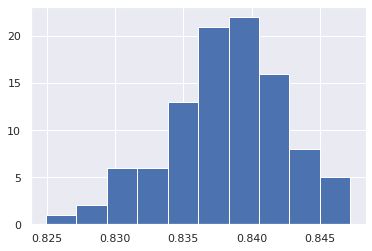

95.0 confidence interval 82.9% and 84.5%


In [263]:
# # Model performance range at 95% confidence level

# from matplotlib import pyplot
# pyplot.hist(stats)
# pyplot.show()
# # confidence intervals
# alpha = 0.95                              
# p = ((1.0-alpha)/2.0) * 100             
# lower = max(0.0, np.percentile(stats, p))  
# p = (alpha+((1.0-alpha)/2.0)) * 100
# upper = min(1.0, np.percentile(stats, p))
# print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### If we put a Gradient Boost Regressor model into a production, then we can expect a maximum of  85% accuracy at 95% of confident interval.

### As we considered only 100 no.of bootstrap iterations and 5% of records in a dataset, in order to reduce the computation time. As long as we increase the no.of iterations and considering all the records, we may get a better accuracy than the above bootstarp model. The same can be expected in production as well.

## Deployment

In [264]:
import pickle
pickle.dump(gbr_model2, open('model.pkl','wb'))

In [265]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
# predict_me = {'cid':239239239, 'room_bed':3, 'room_bath':3, 'living_measure':3000,'lot_measure':1000, 'ceil':1, 'coast':0, 'sight':2, 'condition':2, 'quality':4,'ceil_measure':1000, 'basement':1000, 'yr_built':2015, 'yr_renovated':0, 'zipcode':98023,'lat':47.2752, 'long':-122.349, 'living_measure15':3000, 'lot_measure15':1000, 'furnished':0,'total_area':8000,'dayhours_inDays':300}
# ['quality','lat','long','living_measure','yr_built']
predict_me = {'living_measure':3000, 'quality':4, 'yr_built':2015, 'lat':47.2752, 'long':-122.349 }
print(model.predict([np.array(list(predict_me.values()))]))

[650955.89385454]
